# Lab07

Modeling Plant Phenology

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by running `Trust Notebook` operation found in `Commands` (third icon from the top on the toolbar located left-hand side). You can easily find this menu by typing in "trust" in the search box there.
</div>

In [1]:
using Cropbox

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13761815333779699046\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1134751538565293916\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13761815333779699046\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
using Cropbox.CSV
using Cropbox.DataFrames
using Cropbox.TimeZones
using Dates

## Growing Degree Days

### Ex 7.1

The maize data we used in unit 03 for calibrating the sigmoidal growth curves are from a field experiment took place in Beltsville, Maryland at the research farm of USDA-ARS Beltsville Agricultural Research Center (BARC) in 2002. The data sets include daily weather, weather with every 5 min intervals, biomass by parts, leaf area growth per plant, and the number of leaves determined by counting leaf tips weekly. Planting date was 18 May 2002.

#### Ex 7.1.1

Using the daily weather data, determine the growing degree days (GDD) ($T_b$ = 8.0 °C and $T_{opt}$ = 32.0 °C) accrued for each day.

- Eq 7.1 & 7.2

$$
\begin{align}
\mathrm{GDD}(T) &= \max \{ 0, \min \{ T, T_{opt} \} - T_b \} \\
\mathrm{cGDD} &= \sum_i^n \mathrm{GDD}(T_i) \\
\end{align}
$$

In [4]:
@system GrowingDegreeDay begin
    T: temperature ~ preserve(u"°C", parameter)
    Tb: base_temperature ~ preserve(u"°C", parameter)
    Topt: optimal_temperature ~ preserve(u"°C", parameter)

    GD(T, Tb, Topt): growing_degree => begin
        min(T, Topt) - Tb
    end ~ track(u"K", min=0)

    GDD(GD, Δt=context.clock.step): growing_degree_days => begin
        GD / Δt
    end~ track(u"K/d")

    cGDD(GDD): cumulative_growing_degree_days ~ accumulate(u"K")
end

GrowingDegreeDay

In [5]:
@system GDDController(GrowingDegreeDay, Controller)

GDDController

In [6]:
gdd_config = @config (
    :Clock => (;
        step = 1u"d",
    ),
    :GrowingDegreeDay => (;
        Tb = 8.0,
        Topt = 32.0,
    ),
)

Config for 2 systems:
  Clock
    step = 1 d
  GrowingDegreeDay
    Tb   = 8.0
    Topt = 32.0

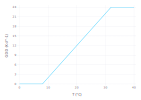

In [7]:
visualize(GDDController, :T, :GDD;
    config = gdd_config,
    xstep = :0 => :T => 0:40,
    kind = :line,
)

In [8]:
manipulate(GDDController, :T, :GDD;
    config = :Clock => :step => 1u"d",
    parameters = :GrowingDegreeDay => (;
        Tb = 0:0.1:10,
        Topt = 1:40,
    ),
    xstep = :0 => :T => -5:45,
    ylim = (0,40),
    kind = :line,
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["GrowingDegreeDay"], Dict{Symbol,Any}(:style => Dict{String,Any}("color" => :darkorchid,"font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tb"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px","color" => :royalblue)))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget",:style => Dict("font-family" => "monospace","width" => "25%"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{WebIO.AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f6360053d00, Task (runnable) @0x00007f6360053d00), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                co

#### 

In [9]:
corn_weather = CSV.read("corn_weather.csv") |> unitfy

239×10 DataFrame. Omitted printing of 4 columns
│ Row │ year  │ jday  │ rad          │ Tavg     │ Tmax     │ Tmin     │
│     │ Int64 │ Int64 │ Quantity…    │ Quantit… │ Quantit… │ Quantit… │
├─────┼───────┼───────┼──────────────┼──────────┼──────────┼──────────┤
│ 1   │ 2002  │ 135   │ 295.8 W m^-2 │ 14.9 °C  │ 22.1 °C  │ 8.6 °C   │
│ 2   │ 2002  │ 136   │ 297.9 W m^-2 │ 18.0 °C  │ 27.7 °C  │ 4.9 °C   │
│ 3   │ 2002  │ 137   │ 224.2 W m^-2 │ 21.3 °C  │ 27.3 °C  │ 14.3 °C  │
│ 4   │ 2002  │ 138   │ 95.8 W m^-2  │ 12.5 °C  │ 17.7 °C  │ 8.0 °C   │
│ 5   │ 2002  │ 139   │ 314.9 W m^-2 │ 9.6 °C   │ 15.6 °C  │ 4.0 °C   │
│ 6   │ 2002  │ 140   │ 284.6 W m^-2 │ 10.1 °C  │ 15.6 °C  │ 4.3 °C   │
│ 7   │ 2002  │ 141   │ 275.0 W m^-2 │ 8.8 °C   │ 14.5 °C  │ 2.6 °C   │
│ 8   │ 2002  │ 142   │ 320.0 W m^-2 │ 11.6 °C  │ 20.1 °C  │ 1.4 °C   │
│ 9   │ 2002  │ 143   │ 318.5 W m^-2 │ 14.7 °C  │ 24.0 °C  │ 3.0 °C   │
│ 10  │ 2002  │ 144   │ 295.7 W m^-2 │ 20.1 °C  │ 29.5 °C  │ 7.1 °C   │
⋮
│ 229 │ 2002  │ 263   │ 157.4 W m^-2 │ 22.8 °C  │ 29.2 °C  │ 16.5 °C  │
│ 230 │ 2002  │ 264   │ 181.6 W m^-2 │ 24.2 °C  │ 30.4 °C  │ 17.1 °C  │
│ 231 │ 2002  │ 265   │ 161.8 W m^-2 │ 23.7 °C  │ 29.7 °C  │ 18.6 °C  │
│ 232 │ 2002  │ 266   │ 174.0 W m^-2 │ 19.3 °C  │ 24.1 °C  │ 10.1 °C  │
│ 233 │ 2002  │ 267   │ 215.9 W m^-2 │ 16.3 °C  │ 25.5 °C  │ 7.8 °C   │
│ 234 │ 2002  │ 268   │ 134.0 W m^-2 │ 17.8 °C  │ 24.3 °C  │ 10.5 °C  │
│ 235 │ 2002  │ 269   │ 32.0 W m^-2  │ 17.5 °C  │ 19.3 °C  │ 15.7 °C  │
│ 236 │ 2002  │ 270   │ 54.0 W m^-2  │ 21.1 °C  │ 28.2 °C  │ 15.2 °C  │
│ 237 │ 2002  │ 271   │ 205.7 W m^-2 │ 20.2 °C  │ 25.4 °C  │ 13.2 °C  │
│ 238 │ 2002  │ 272   │ 194.9 W m^-2 │ 16.4 °C  │ 24.3 °C  │ 10.4 °C  │
│ 239 │ 2002  │ 273   │ 143.1 W m^-2 │ 17.9 °C  │ 24.0 °C  │ 12.2 °C  │

In [10]:
@system Temperature(DateStore) begin
    t(i): date ~ track::Date

    tempkey => :Tavg ~ preserve::Symbol(parameter)
    T(s): temperature ~ drive(key=tempkey', u"°C")
end

Temperature

`DateStore` is one of built-in systems provided by Cropbox. It is a mix-in that allows a system to load a data frame *store* from file, for example, containing a series of weather observations, and let other variables like temperature get populated from the store for each time step advance. Often we need some parameters to control how it works.

`Temperature` system is based on a loaded data store to provide `temperature` variable `T` based on `date` index. The name of column in the file for temperature is `:Tavg` as specified in `tempkey` (temperature key).

In [11]:
corn_config = @config (
    :Calendar => (;
        init = ZonedDateTime(2002, 5, 15, tz"America/New_York"),
        last = ZonedDateTime(2002, 9, 30, tz"America/New_York"),
    ),
    :Clock => (;
        step = 1u"d",
    ),
    :Temperature => (;
        filename = "corn_weather.csv",
        indexkey = :date,
        tempkey = :Tavg,
    ),
)

Config for 3 systems:
  Calendar
    init = ZonedDateTime(2002, 5, 15, tz"America/New_York")
    last = ZonedDateTime(2002, 9, 30, tz"America/New_York")
  Clock
    step = 1 d
  Temperature
    filename = "corn_weather.csv"
    indexkey = :date
    tempkey  = :Tavg

`Calendar` system embedded in `DateStore` accepts `init` and `last` variables in `ZonedDateTime` type which is required for representing a timestamp with time zone support. We need time zone support as the default time resolution in Cropbox is an hour and this can become quite tricky to hanle sometimes, for example, due to daylight saving transition. To simplify our exercises, we will use daily time step for the most part of simulation here. `Calendar` also provides `stop` variable depending on the interval between `init` and `last` to inform `simulate()` function when simulation should be done.

In [12]:
@system GDDCalculator(GrowingDegreeDay, Temperature, Controller)

GDDCalculator

In [13]:
gddc_config = @config (
    corn_config,
    gdd_config,
)

Config for 4 systems:
  Calendar
    init = ZonedDateTime(2002, 5, 15, tz"America/New_York")
    last = ZonedDateTime(2002, 9, 30, tz"America/New_York")
  Clock
    step = 1 d
  Temperature
    filename = "corn_weather.csv"
    indexkey = :date
    tempkey  = :Tavg
  GrowingDegreeDay
    Tb   = 8.0
    Topt = 32.0

In [14]:
simulate(GDDCalculator;
    config = gddc_config,
    stop = "calendar.stop",
    index = :t,
    target = [:GDD, :cGDD],
)

Iterations: 138 	 Time: 0:00:01


139×3 DataFrame
│ Row │ t          │ GDD         │ cGDD     │
│     │ Date       │ Quantity…   │ Quantit… │
├─────┼────────────┼─────────────┼──────────┤
│ 1   │ 2002-05-15 │ 6.9 K d^-1  │ 0.0 K    │
│ 2   │ 2002-05-16 │ 10.0 K d^-1 │ 6.9 K    │
│ 3   │ 2002-05-17 │ 13.3 K d^-1 │ 16.9 K   │
│ 4   │ 2002-05-18 │ 4.5 K d^-1  │ 30.2 K   │
│ 5   │ 2002-05-19 │ 1.6 K d^-1  │ 34.7 K   │
│ 6   │ 2002-05-20 │ 2.1 K d^-1  │ 36.3 K   │
│ 7   │ 2002-05-21 │ 0.8 K d^-1  │ 38.4 K   │
│ 8   │ 2002-05-22 │ 3.6 K d^-1  │ 39.2 K   │
│ 9   │ 2002-05-23 │ 6.7 K d^-1  │ 42.8 K   │
│ 10  │ 2002-05-24 │ 12.1 K d^-1 │ 49.5 K   │
⋮
│ 129 │ 2002-09-20 │ 14.8 K d^-1 │ 1917.8 K │
│ 130 │ 2002-09-21 │ 16.2 K d^-1 │ 1932.6 K │
│ 131 │ 2002-09-22 │ 15.7 K d^-1 │ 1948.8 K │
│ 132 │ 2002-09-23 │ 11.3 K d^-1 │ 1964.5 K │
│ 133 │ 2002-09-24 │ 8.3 K d^-1  │ 1975.8 K │
│ 134 │ 2002-09-25 │ 9.8 K d^-1  │ 1984.1 K │
│ 135 │ 2002-09-26 │ 9.5 K d^-1  │ 1993.9 K │
│ 136 │ 2002-09-27 │ 13.1 K d^-1 │ 2003.4 K │
│ 137 │ 2002-09-28 │ 12.2 K d^-1 │ 2016.5 K │
│ 138 │ 2002-09-29 │ 8.4 K d^-1  │ 2028.7 K │
│ 139 │ 2002-09-30 │ 9.9 K d^-1  │ 2037.1 K │

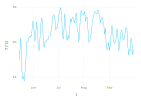

In [15]:
visualize(GDDCalculator, :t, :T;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line
)

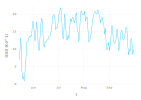

In [16]:
visualize(GDDCalculator, :t, :GDD;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line,
)

#### Ex 7.1.2

Determine cumulative GDD (cGDD) since planting until harvest on 30 September 2002.

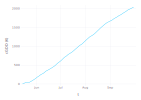

In [17]:
visualize(GDDCalculator, :t, :cGDD;
    config = gddc_config,
    stop = "calendar.stop",
    kind = :line,
)

#### Ex 7.1.3

Determine leaf appearance rate for up to 17 leaves based on phyllochron of 43.0.

In [18]:
@system LeafAppearanceGD(GrowingDegreeDay, Temperature, Controller) begin
    N: leaves_total ~ preserve::Int(parameter)
    p: phyllochron ~ preserve(u"K", parameter)

    n(cGDD, p): leaves_appeared => (cGDD / p) ~ track::Int(round=:floor)

    match(n, N) => (n >= N) ~ flag
    stop(m=match, s=calendar.stop) => (m || s) ~ flag
end

LeafAppearanceGD

`flag` is a kind of state variable similar to `track` with `Bool` type, but its evaluation is delayed until other variables are updated and make sure to avoid cyclic dependecies which could be often encountered when tracking multiple stages of phenology development in complex crop models. `match` is a flag variable indicating a certain threshold of thermal accumulation is fulfilled. `stop` is a flag variable to determine if the simulation needs to be terminated which could happen when match is found or no more time is left in the calendar.

In [19]:
lagd_config = @config (
    corn_config,
    gdd_config,
    :LeafAppearanceGD => (;
        N = 17,
        p = 43.0,
    ),
)

Config for 5 systems:
  Calendar
    init = ZonedDateTime(2002, 5, 15, tz"America/New_York")
    last = ZonedDateTime(2002, 9, 30, tz"America/New_York")
  Clock
    step = 1 d
  Temperature
    filename = "corn_weather.csv"
    indexkey = :date
    tempkey  = :Tavg
  GrowingDegreeDay
    Tb   = 8.0
    Topt = 32.0
  LeafAppearanceGD
    N = 17
    p = 43.0

In [20]:
lagd_result = simulate(LeafAppearanceGD;
    config = lagd_config,
    stop = :stop,
    index = :t,
    target = [:T, :GDD, :cGDD, :p, :n, :match, :stop],
)

Iterations: 54 	 Time: 0:00:01


55×8 DataFrame. Omitted printing of 2 columns
│ Row │ t          │ T        │ GDD         │ cGDD     │ p        │ n     │
│     │ Date       │ Quantit… │ Quantity…   │ Quantit… │ Quantit… │ Int64 │
├─────┼────────────┼──────────┼─────────────┼──────────┼──────────┼───────┤
│ 1   │ 2002-05-15 │ 14.9 °C  │ 6.9 K d^-1  │ 0.0 K    │ 43.0 K   │ 0     │
│ 2   │ 2002-05-16 │ 18.0 °C  │ 10.0 K d^-1 │ 6.9 K    │ 43.0 K   │ 0     │
│ 3   │ 2002-05-17 │ 21.3 °C  │ 13.3 K d^-1 │ 16.9 K   │ 43.0 K   │ 0     │
│ 4   │ 2002-05-18 │ 12.5 °C  │ 4.5 K d^-1  │ 30.2 K   │ 43.0 K   │ 0     │
│ 5   │ 2002-05-19 │ 9.6 °C   │ 1.6 K d^-1  │ 34.7 K   │ 43.0 K   │ 0     │
│ 6   │ 2002-05-20 │ 10.1 °C  │ 2.1 K d^-1  │ 36.3 K   │ 43.0 K   │ 0     │
│ 7   │ 2002-05-21 │ 8.8 °C   │ 0.8 K d^-1  │ 38.4 K   │ 43.0 K   │ 0     │
│ 8   │ 2002-05-22 │ 11.6 °C  │ 3.6 K d^-1  │ 39.2 K   │ 43.0 K   │ 0     │
│ 9   │ 2002-05-23 │ 14.7 °C  │ 6.7 K d^-1  │ 42.8 K   │ 43.0 K   │ 0     │
│ 10  │ 2002-05-24 │ 20.1 °C  │ 12.1 K d^-1 │ 49.5 K   │ 43.0 K   │ 1     │
⋮
│ 45  │ 2002-06-28 │ 23.5 °C  │ 15.5 K d^-1 │ 557.0 K  │ 43.0 K   │ 12    │
│ 46  │ 2002-06-29 │ 24.1 °C  │ 16.1 K d^-1 │ 572.5 K  │ 43.0 K   │ 13    │
│ 47  │ 2002-06-30 │ 24.0 °C  │ 16.0 K d^-1 │ 588.6 K  │ 43.0 K   │ 13    │
│ 48  │ 2002-07-01 │ 25.8 °C  │ 17.8 K d^-1 │ 604.6 K  │ 43.0 K   │ 14    │
│ 49  │ 2002-07-02 │ 27.9 °C  │ 19.9 K d^-1 │ 622.4 K  │ 43.0 K   │ 14    │
│ 50  │ 2002-07-03 │ 29.2 °C  │ 21.2 K d^-1 │ 642.3 K  │ 43.0 K   │ 14    │
│ 51  │ 2002-07-04 │ 29.9 °C  │ 21.9 K d^-1 │ 663.5 K  │ 43.0 K   │ 15    │
│ 52  │ 2002-07-05 │ 28.2 °C  │ 20.2 K d^-1 │ 685.4 K  │ 43.0 K   │ 15    │
│ 53  │ 2002-07-06 │ 23.1 °C  │ 15.1 K d^-1 │ 705.6 K  │ 43.0 K   │ 16    │
│ 54  │ 2002-07-07 │ 20.8 °C  │ 12.8 K d^-1 │ 720.7 K  │ 43.0 K   │ 16    │
│ 55  │ 2002-07-08 │ 23.5 °C  │ 15.5 K d^-1 │ 733.5 K  │ 43.0 K   │ 17    │

In [21]:
last(lagd_result, 10)

10×8 DataFrame. Omitted printing of 2 columns
│ Row │ t          │ T        │ GDD         │ cGDD     │ p        │ n     │
│     │ Date       │ Quantit… │ Quantity…   │ Quantit… │ Quantit… │ Int64 │
├─────┼────────────┼──────────┼─────────────┼──────────┼──────────┼───────┤
│ 1   │ 2002-06-29 │ 24.1 °C  │ 16.1 K d^-1 │ 572.5 K  │ 43.0 K   │ 13    │
│ 2   │ 2002-06-30 │ 24.0 °C  │ 16.0 K d^-1 │ 588.6 K  │ 43.0 K   │ 13    │
│ 3   │ 2002-07-01 │ 25.8 °C  │ 17.8 K d^-1 │ 604.6 K  │ 43.0 K   │ 14    │
│ 4   │ 2002-07-02 │ 27.9 °C  │ 19.9 K d^-1 │ 622.4 K  │ 43.0 K   │ 14    │
│ 5   │ 2002-07-03 │ 29.2 °C  │ 21.2 K d^-1 │ 642.3 K  │ 43.0 K   │ 14    │
│ 6   │ 2002-07-04 │ 29.9 °C  │ 21.9 K d^-1 │ 663.5 K  │ 43.0 K   │ 15    │
│ 7   │ 2002-07-05 │ 28.2 °C  │ 20.2 K d^-1 │ 685.4 K  │ 43.0 K   │ 15    │
│ 8   │ 2002-07-06 │ 23.1 °C  │ 15.1 K d^-1 │ 705.6 K  │ 43.0 K   │ 16    │
│ 9   │ 2002-07-07 │ 20.8 °C  │ 12.8 K d^-1 │ 720.7 K  │ 43.0 K   │ 16    │
│ 10  │ 2002-07-08 │ 23.5 °C  │ 15.5 K d^-1 │ 733.5 K  │ 43.0 K   │ 17    │

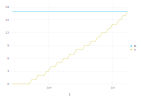

In [22]:
visualize(LeafAppearanceGD, :t, [:N, :n];
    config = lagd_config,
    stop = :stop,
    kind = :line,
)

#### Ex 7.1.4

Plot the predicted and observed leaf appearance data over days after planting (DAP) in the same figure.

In [23]:
corn_obs = CSV.read("corn_sample.csv") |> unitfy

111×17 DataFrame. Omitted printing of 10 columns
│ Row │ year  │ jday  │ date       │ SampleNo │ Stage   │ Ht       │ Diameter  │
│     │ Int64 │ Int64 │ Date       │ Int64    │ String? │ Float64? │ Quantit…? │
├─────┼───────┼───────┼────────────┼──────────┼─────────┼──────────┼───────────┤
│ 1   │ 2002  │ 162   │ 2002-06-11 │ 1        │ V5      │ 48.0     │ missing   │
│ 2   │ 2002  │ 162   │ 2002-06-11 │ 2        │ V5      │ 44.0     │ missing   │
│ 3   │ 2002  │ 162   │ 2002-06-11 │ 3        │ V5      │ 40.0     │ missing   │
│ 4   │ 2002  │ 162   │ 2002-06-11 │ 4        │ V5      │ 49.5     │ missing   │
│ 5   │ 2002  │ 162   │ 2002-06-11 │ 5        │ V5      │ 51.5     │ missing   │
│ 6   │ 2002  │ 162   │ 2002-06-11 │ 6        │ V5      │ 48.5     │ missing   │
│ 7   │ 2002  │ 162   │ 2002-06-11 │ 7        │ V5      │ 49.0     │ missing   │
│ 8   │ 2002  │ 162   │ 2002-06-11 │ 8        │ V5      │ 40.5     │ missing   │
│ 9   │ 2002  │ 162   │ 2002-06-11 │ 9        │ V4      │ 39.0     │ missing   │
│ 10  │ 2002  │ 162   │ 2002-06-11 │ 10       │ V5      │ 51.0     │ missing   │
⋮
│ 101 │ 2002  │ 242   │ 2002-08-30 │ 10       │ R6      │ 281.0    │ 23.94 mm  │
│ 102 │ 2002  │ 261   │ 2002-09-18 │ 1        │ missing │ missing  │ missing   │
│ 103 │ 2002  │ 261   │ 2002-09-18 │ 2        │ missing │ missing  │ missing   │
│ 104 │ 2002  │ 261   │ 2002-09-18 │ 3        │ missing │ missing  │ missing   │
│ 105 │ 2002  │ 261   │ 2002-09-18 │ 4        │ missing │ missing  │ missing   │
│ 106 │ 2002  │ 261   │ 2002-09-18 │ 5        │ missing │ missing  │ missing   │
│ 107 │ 2002  │ 261   │ 2002-09-18 │ 6        │ missing │ missing  │ missing   │
│ 108 │ 2002  │ 261   │ 2002-09-18 │ 7        │ missing │ missing  │ missing   │
│ 109 │ 2002  │ 261   │ 2002-09-18 │ 8        │ missing │ missing  │ missing   │
│ 110 │ 2002  │ 261   │ 2002-09-18 │ 9        │ missing │ missing  │ missing   │
│ 111 │ 2002  │ 261   │ 2002-09-18 │ 10       │ missing │ missing  │ missing   │

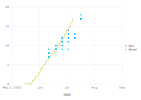

In [24]:
p = plot(corn_obs, :date, :TotLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceGD, :t, :n;
    config = lagd_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

#### Ex 7.1.5

Determine RMSE and EF, and interpret and discuss your findings.

In [25]:
evaluate(LeafAppearanceGD, corn_obs;
    config = lagd_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :rmse,
)

1.5732132722552274

In [26]:
evaluate(LeafAppearanceGD, corn_obs;
    config = lagd_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :ef,
)

0.24297457465111838

## Beta Distribution Function

### Ex 7.2

Using the same data as above, answer the following questions based on the leaf tip appearance rate predicted by the beta function.

- Eq 7.3

$$
r(T) = R_{max} \left( \frac{T_{ceil} - T}{T_{ceil} - T_{opt}} \right) \left( \frac{T - T_{min}}{T_{opt} - T_{min}} \right) ^ {\frac{T_{opt} - T_{min}}{T_{ceil} - T_{opt}}}
$$

Here we explicitly use $T_{min}$ to make sure we have a proper unit (`K` instead of `°C`) from [calculation bewteen temperature variables](https://painterqubits.github.io/Unitful.jl/stable/temperature/).

#### Ex 7.2.1

Create a system to predict the leaf appearance rate based on beta function with the parameter values found in Yan and Hunt (1999): $R_{max}$ = 0.58 $\mathrm{d^{-1}}$, $T_{opt}$ = 31.4 °C, and $T_{ceil}$ = 41.0 °C.

In [27]:
@system BetaFunc begin
    T: temperature ~ preserve(u"°C", parameter)
    Topt: optimal_temperature ~ preserve(u"°C", parameter)
    Tceil: ceiling_temperature ~ preserve(u"°C", parameter)
    Tmin: minimum_temperature => 0 ~ preserve(u"°C", parameter)
    Rmax: maximum_rate => 1 ~ preserve(parameter, u"d^-1")

    r(T, Topt, Tceil, Tmin, Rmax): rate => begin
        Rmax * (Tceil - T) / (Tceil - Topt) * ((T - Tmin) / (Topt - Tmin))^((Topt - Tmin) / (Tceil - Topt))
    end ~ track(u"d^-1", min=0, max=Rmax)

    R(r): cumulative_rate ~ accumulate
end

BetaFunc

In [28]:
@system BFController(BetaFunc, Controller)

BFController

In [29]:
bf_config = @config (
    :BetaFunc => (;
        Rmax = 0.58,
        Topt = 31.4,
        Tceil = 41.0,
    ),
)

Config for 1 systems:
  BetaFunc
    Rmax  = 0.58
    Topt  = 31.4
    Tceil = 41.0

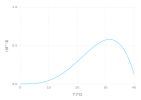

In [30]:
visualize(BFController, :T, :r;
    config = bf_config,
    xstep = :0 => :T => 0:40,
    kind = :line,
)

In [31]:
manipulate(BFController, :T, :r;
    parameters = :BetaFunc => (;
        Rmax = 0:0.1:1,
        Topt = 0:0.1:45,
        Tceil = 0:0.1:45,
    ),
    xstep = :0 => :T => 0:50,
    ylim = (0,1),
    kind = :line,
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["BetaFunc"], Dict{Symbol,Any}(:style => Dict{String,Any}("color" => :darkorchid,"font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Rmax"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px","color" => :royalblue)))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget",:style => Dict("font-family" => "monospace","width" => "25%"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{WebIO.AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f6363408280, Task (runnable) @0x00007f6363408280), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n

#### Ex 7.2.2

Using daily weather data, simulate the leaf tip appearance up to 17 leaves throughout the experiment based on the beta function model.

In [32]:
@system BFCalculator(BetaFunc, Temperature, Controller)

BFCalculator

In [33]:
bfc_config = @config (
    corn_config,
    bf_config,
)

Config for 4 systems:
  Calendar
    init = ZonedDateTime(2002, 5, 15, tz"America/New_York")
    last = ZonedDateTime(2002, 9, 30, tz"America/New_York")
  Clock
    step = 1 d
  Temperature
    filename = "corn_weather.csv"
    indexkey = :date
    tempkey  = :Tavg
  BetaFunc
    Rmax  = 0.58
    Topt  = 31.4
    Tceil = 41.0

In [34]:
simulate(BFCalculator;
    config = bfc_config,
    stop = "calendar.stop",
    index = :t,
    target = [:r, :R],
)

139×3 DataFrame
│ Row │ t          │ r              │ R        │
│     │ Date       │ Quantity…      │ Float64  │
├─────┼────────────┼────────────────┼──────────┤
│ 1   │ 2002-05-15 │ 0.137685 d^-1  │ 0.0      │
│ 2   │ 2002-05-16 │ 0.225146 d^-1  │ 0.137685 │
│ 3   │ 2002-05-17 │ 0.334444 d^-1  │ 0.362831 │
│ 4   │ 2002-05-18 │ 0.0846455 d^-1 │ 0.697275 │
│ 5   │ 2002-05-19 │ 0.0393301 d^-1 │ 0.781921 │
│ 6   │ 2002-05-20 │ 0.0456957 d^-1 │ 0.821251 │
│ 7   │ 2002-05-21 │ 0.0303425 d^-1 │ 0.866947 │
│ 8   │ 2002-05-22 │ 0.0683851 d^-1 │ 0.897289 │
│ 9   │ 2002-05-23 │ 0.132741 d^-1  │ 0.965674 │
│ 10  │ 2002-05-24 │ 0.293517 d^-1  │ 1.09842  │
⋮
│ 129 │ 2002-09-20 │ 0.386011 d^-1  │ 49.8362  │
│ 130 │ 2002-09-21 │ 0.433 d^-1     │ 50.2222  │
│ 131 │ 2002-09-22 │ 0.416455 d^-1  │ 50.6552  │
│ 132 │ 2002-09-23 │ 0.266841 d^-1  │ 51.0716  │
│ 133 │ 2002-09-24 │ 0.174787 d^-1  │ 51.3385  │
│ 134 │ 2002-09-25 │ 0.218954 d^-1  │ 51.5132  │
│ 135 │ 2002-09-26 │ 0.209791 d^-1  │ 51.7322  │
│ 136 │ 2002-09-27 │ 0.327574 d^-1  │ 51.942   │
│ 137 │ 2002-09-28 │ 0.296893 d^-1  │ 52.2696  │
│ 138 │ 2002-09-29 │ 0.177597 d^-1  │ 52.5665  │
│ 139 │ 2002-09-30 │ 0.222042 d^-1  │ 52.7441  │

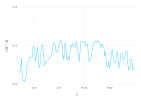

In [35]:
visualize(BFCalculator, :t, :r;
    config = bfc_config,
    stop = "calendar.stop",
    kind = :line,
)

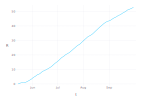

In [36]:
visualize(BFCalculator, :t, :R;
    config = bfc_config,
    stop = "calendar.stop",
    kind = :line,
)

In [37]:
@system LeafAppearanceBF(BetaFunc, Temperature, Controller) begin
    N: leaves_total ~ preserve::Int(parameter)

    n(R): leaves_appeared ~ track::Int(round=:floor)

    match(n, N) => (n >= N) ~ flag
    stop(m=match, s=calendar.stop) => (m || s) ~ flag
end

LeafAppearanceBF

In [38]:
labf_config = @config (
    corn_config,
    bf_config,
    :LeafAppearanceBF => (;
        N = 17,
    ),
)

Config for 5 systems:
  Calendar
    init = ZonedDateTime(2002, 5, 15, tz"America/New_York")
    last = ZonedDateTime(2002, 9, 30, tz"America/New_York")
  Clock
    step = 1 d
  Temperature
    filename = "corn_weather.csv"
    indexkey = :date
    tempkey  = :Tavg
  BetaFunc
    Rmax  = 0.58
    Topt  = 31.4
    Tceil = 41.0
  LeafAppearanceBF
    N = 17

In [39]:
labf_result = simulate(LeafAppearanceBF;
    config = labf_config,
    stop = :stop,
    index = :t,
    target = [:T, :r, :R, :n, :match, :stop],
)

Iterations: 50 	 Time: 0:00:01


51×7 DataFrame. Omitted printing of 1 columns
│ Row │ t          │ T        │ r              │ R        │ n     │ match │
│     │ Date       │ Quantit… │ Quantity…      │ Float64  │ Int64 │ Bool  │
├─────┼────────────┼──────────┼────────────────┼──────────┼───────┼───────┤
│ 1   │ 2002-05-15 │ 14.9 °C  │ 0.137685 d^-1  │ 0.0      │ 0     │ 0     │
│ 2   │ 2002-05-16 │ 18.0 °C  │ 0.225146 d^-1  │ 0.137685 │ 0     │ 0     │
│ 3   │ 2002-05-17 │ 21.3 °C  │ 0.334444 d^-1  │ 0.362831 │ 0     │ 0     │
│ 4   │ 2002-05-18 │ 12.5 °C  │ 0.0846455 d^-1 │ 0.697275 │ 0     │ 0     │
│ 5   │ 2002-05-19 │ 9.6 °C   │ 0.0393301 d^-1 │ 0.781921 │ 0     │ 0     │
│ 6   │ 2002-05-20 │ 10.1 °C  │ 0.0456957 d^-1 │ 0.821251 │ 0     │ 0     │
│ 7   │ 2002-05-21 │ 8.8 °C   │ 0.0303425 d^-1 │ 0.866947 │ 0     │ 0     │
│ 8   │ 2002-05-22 │ 11.6 °C  │ 0.0683851 d^-1 │ 0.897289 │ 0     │ 0     │
│ 9   │ 2002-05-23 │ 14.7 °C  │ 0.132741 d^-1  │ 0.965674 │ 0     │ 0     │
│ 10  │ 2002-05-24 │ 20.1 °C  │ 0.293517 d^-1  │ 1.09842  │ 1     │ 0     │
⋮
│ 41  │ 2002-06-24 │ 26.1 °C  │ 0.491734 d^-1  │ 12.081   │ 12    │ 0     │
│ 42  │ 2002-06-25 │ 27.8 °C  │ 0.535492 d^-1  │ 12.5728  │ 12    │ 0     │
│ 43  │ 2002-06-26 │ 27.8 °C  │ 0.535492 d^-1  │ 13.1083  │ 13    │ 0     │
│ 44  │ 2002-06-27 │ 26.8 °C  │ 0.511009 d^-1  │ 13.6438  │ 13    │ 0     │
│ 45  │ 2002-06-28 │ 23.5 °C  │ 0.409753 d^-1  │ 14.1548  │ 14    │ 0     │
│ 46  │ 2002-06-29 │ 24.1 °C  │ 0.429718 d^-1  │ 14.5645  │ 14    │ 0     │
│ 47  │ 2002-06-30 │ 24.0 °C  │ 0.426422 d^-1  │ 14.9942  │ 14    │ 0     │
│ 48  │ 2002-07-01 │ 25.8 °C  │ 0.483021 d^-1  │ 15.4207  │ 15    │ 0     │
│ 49  │ 2002-07-02 │ 27.9 °C  │ 0.537714 d^-1  │ 15.9037  │ 15    │ 0     │
│ 50  │ 2002-07-03 │ 29.2 °C  │ 0.562153 d^-1  │ 16.4414  │ 16    │ 0     │
│ 51  │ 2002-07-04 │ 29.9 °C  │ 0.571409 d^-1  │ 17.0035  │ 17    │ 1     │

In [40]:
last(labf_result, 10)

10×7 DataFrame
│ Row │ t          │ T        │ r             │ R       │ n     │ match │ stop │
│     │ Date       │ Quantit… │ Quantity…     │ Float64 │ Int64 │ Bool  │ Bool │
├─────┼────────────┼──────────┼───────────────┼─────────┼───────┼───────┼──────┤
│ 1   │ 2002-06-25 │ 27.8 °C  │ 0.535492 d^-1 │ 12.5728 │ 12    │ 0     │ 0    │
│ 2   │ 2002-06-26 │ 27.8 °C  │ 0.535492 d^-1 │ 13.1083 │ 13    │ 0     │ 0    │
│ 3   │ 2002-06-27 │ 26.8 °C  │ 0.511009 d^-1 │ 13.6438 │ 13    │ 0     │ 0    │
│ 4   │ 2002-06-28 │ 23.5 °C  │ 0.409753 d^-1 │ 14.1548 │ 14    │ 0     │ 0    │
│ 5   │ 2002-06-29 │ 24.1 °C  │ 0.429718 d^-1 │ 14.5645 │ 14    │ 0     │ 0    │
│ 6   │ 2002-06-30 │ 24.0 °C  │ 0.426422 d^-1 │ 14.9942 │ 14    │ 0     │ 0    │
│ 7   │ 2002-07-01 │ 25.8 °C  │ 0.483021 d^-1 │ 15.4207 │ 15    │ 0     │ 0    │
│ 8   │ 2002-07-02 │ 27.9 °C  │ 0.537714 d^-1 │ 15.9037 │ 15    │ 0     │ 0    │
│ 9   │ 2002-07-03 │ 29.2 °C  │ 0.562153 d^-1 │ 16.4414 │ 16    │ 0     │ 0    │
│ 10  │ 2002-07-04 │ 29.9 °C  │ 0.571409 d^-1 │ 17.0035 │ 17    │ 1     │ 1    │

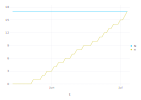

In [41]:
visualize(LeafAppearanceBF, :t, [:N, :n];
    config = labf_config,
    stop = :stop,
    kind = :line,
)

#### Ex 7.2.3

Plot the predicted and observed leaf appearance data over days after planting (DAP) in the same figure.

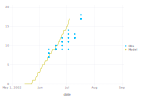

In [42]:
p = plot(corn_obs, :date, :TotLfNo;
    xlim = (Date(2002, 5), Date(2002, 9)),
    ylim = (0, 20),
    name = "Obs",
)
visualize!(p, LeafAppearanceBF, :t, :n;
    config = labf_config,
    stop = :stop,
    kind = :line,
    name = "Model",
)

#### Ex 7.2.4

Determine RMSE and EF, and interpret and discuss your findings.

In [43]:
evaluate(LeafAppearanceBF, corn_obs;
    config = labf_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :rmse,
)

2.564176280991617

In [44]:
evaluate(LeafAppearanceBF, corn_obs;
    config = labf_config,
    index = :date => :t,
    target = :TotLfNo => :n,
    stop = :stop,
    metric = :ef,
)

-1.011087746128847

## Chilling-Forcing Model

### Ex 7.3

In this exercise, we will calibrate and evaluate a two-stage tree phenology model for predicting peak bloom dates of Yoshino cherries in Washington DC. Because of historical, cultural, and economic importance of these Tidal Basin cherry trees, the National Park Service horticulture staff pays meticulous attention to monitor their flowering phenology and bloom dates trees (See how NPS collect cherry phenology data: https://www.nps.gov/subjects/cherryblossom/bloom-watch.htm). That is, data quality is likely to be quite good. Our own UW campus also has many cherry trees and the Yoshino cherries in the Quad in particular are touted for their spectacular blooms and attract many visitors from the public who appreciate the spring blooms. Until recently there was no coordinated effort of monitoring the bloom time of UW cherries so far except for some quasi-observational data based on local and campus news (*e.g.*, Daily), social media (*e.g.*, [UW Cherry Blossom Twitter](https://twitter.com/uwcherryblossom)), and casual records (See Chung et al. (2011)). This means that data quality is likely to be low for UW cherry blossoms. 

The chilling-forcing model (Cesaraccio et al., 2004) has been implemented in the Cropbox framework and will be available for you. The historical peak bloom dates of Washington DC and UW campus will be available (`Cherry_PBD.xls`) along with the corresponding temperature data at nearby weather stations for this exercise.

### Model

Before we move on, here is a bit explanation of theory behind the model. [Cesaraccio *et al.*](https://doi.org/10.1016/j.agrformet.2004.03.002) split up dormancy break into two distinctive steps, rest and quiescence, that required the same amount of chilling and subsequent anti-chilling accumulation in the opposite direction. Later this model was [extended](https://doi.org/10.1371/journal.pone.0027439) to predict peak bloom date of cherry tree coming after bud burst. The following equation represents our adaptation of this chilling and forcing (CF) model with three parameters: temperature threshold ($T_c$), chilling ($R_{\mathtt{C}}$) and forcing ($R_{\mathtt{F}}$) requirements.

The original model used linear interpolation between maximum and minimum temperature values (Figure 7.4) to incorporate daily fluctuation of temperature. In this exercise, we use a much simpler form of the equation which works better when used with hourly temperature, yet with daily dataset for the sake of simplicity.

$$
\begin{aligned}
T_a & = \begin{cases}
  T & \text{if } T \geq 0 \\
  0 & \text{otherwise}
\end{cases} \\
\Delta T & = \frac{T_a - T_c}{\Delta t} \\
c & = \begin{cases}
  \Delta T & \text{if } \Delta T < 0 \\
  0 & \text{otherwise}
\end{cases} \\
f & = \begin{cases}
  \Delta T & \text{if } \Delta T > 0 \\
  0 & \text{otherwise}
\end{cases} \\
\sum_{t_0}^{\hat{t}_d-1} c & > R_{\mathtt{C}} \geq \sum_{t_0}^{\hat{t}_d} c \\
\sum_{\hat{t}_d}^{\hat{t}-1} f & < R_{\mathtt{F}} \leq \sum_{\hat{t}_d}^{\hat{t}} f \\
\end{aligned}
$$

In [45]:
@system ChillForceEstimator(Temperature, Controller) begin
    Tc: temperature_threshold ~ preserve(u"°C", parameter)
    Rc: chilling_requirement ~ preserve(u"K", parameter)
    Rf: forcing_requirement ~ preserve(u"K", parameter)

    year(t=calendar.last) => Dates.year(t) ~ preserve::Int
    tf(year): forced_dormancy_release_date => Date(year, 3, 1) ~ preserve::Date(parameter)

    doy(t): day_of_year => Dates.dayofyear(t) ~ track::Int(u"d")

    Ta(T) ~ track(u"°C", min=0)
    Δt(context.clock.step) ~ preserve(u"d")
    ΔT(Ta, Tc, Δt) => (Ta - Tc) / Δt ~ track(u"K/d")

    c(ΔT): chilling ~ track(u"K/d", max=0)
    C(c): chilling_accumulated ~ accumulate(when=!d, u"K")
    d(C, Rc, tf, t): chilling_done => (C <= Rc || tf <= t) ~ flag

    f(ΔT): forcing ~ track(u"K/d", min=0)
    F(f): forcing_accumulated ~ accumulate(when=d, u"K")

    match(F, Rf) => (F >= Rf) ~ flag
    stop(m=match, s=calendar.stop) => (m || s) ~ flag
end

ChillForceEstimator

In general, we can find similarity to GDD model we implemented earlier. Notable difference is that now we have two separate variables for accumulating chilling (`C` with rate `c`) and forcing (`F` with rate `f`). The end of chilling accumulation, thus the onset of forcing accumulation is determined by `chilling_done` flag (`d`) which is supplied to `when` tag in the decalrartion of both accumulating variables.

We also need to think about handling exceptional cases which we could face especailly when trying to plug a large range of parameter values for calibration. There is a chance that chilling requirement is never fulfilled by either too high chilling requirement or too low rate of chilling accumulation. To prevent such case, we set `forced_dormancy_release_date` to March 1st of the given year.

Similarly, sometimes we might never reach the forcing requirement within the given time frame set by `last` date of `Calendar` which results into no entry in the output. We take care of such case by supplying a `callback` function for `simulate()` to fill in with an arbitrary estimation date (365th day of the year).

In [46]:
callback(s, m) = if s.stop' && !s.match'
    m.result[end, :doy] = 365u"d"
end

callback (generic function with 1 method)

For convenience, we amek make `estimate()` function to call `simulate()` with some default arguments including `stop` and `callback` as well as configuration generated for each year by `cherry_config()` function explained later.

In [47]:
estimate(S, years;
    config,
    index = [:year, :doy],
    target = [],
    stop = :stop,
    kwargs...
) = simulate(S;
    configs = @config(config + cherry_config.(years)),
    index,
    target,
    stop,
    snap = stop,
    callback,
    kwargs...
)

estimate (generic function with 1 method)

### Weather

In [48]:
dc_weather = CSV.read("dc_weather.csv") |> unitfy

30315×2 DataFrame
│ Row   │ date       │ Tavg       │
│       │ Date       │ Quantity…  │
├───────┼────────────┼────────────┤
│ 1     │ 1936-09-01 │ 25.2294 °C │
│ 2     │ 1936-09-02 │ 22.1812 °C │
│ 3     │ 1936-09-03 │ 22.1854 °C │
│ 4     │ 1936-09-04 │ 22.5021 °C │
│ 5     │ 1936-09-05 │ 21.8208 °C │
│ 6     │ 1936-09-06 │ 21.4979 °C │
│ 7     │ 1936-09-07 │ 23.7937 °C │
│ 8     │ 1936-09-08 │ 27.2729 °C │
│ 9     │ 1936-09-09 │ 28.6521 °C │
│ 10    │ 1936-09-10 │ 25.6458 °C │
⋮
│ 30305 │ 2019-08-21 │ 27.0703 °C │
│ 30306 │ 2019-08-22 │ 29.1633 °C │
│ 30307 │ 2019-08-23 │ 22.7173 °C │
│ 30308 │ 2019-08-24 │ 22.1639 °C │
│ 30309 │ 2019-08-25 │ 22.2242 °C │
│ 30310 │ 2019-08-26 │ 21.0961 °C │
│ 30311 │ 2019-08-27 │ 22.4837 °C │
│ 30312 │ 2019-08-28 │ 23.288 °C  │
│ 30313 │ 2019-08-29 │ 24.8506 °C │
│ 30314 │ 2019-08-30 │ 24.8278 °C │
│ 30315 │ 2019-08-31 │ 26.7477 °C │

In [49]:
dc_config = @config (
    :Temperature => (;
        filename = "dc_weather.csv",
        indexkey = :date,
        tempkey = :Tavg,
    ),
)

Config for 1 systems:
  Temperature
    filename = "dc_weather.csv"
    indexkey = :date
    tempkey  = :Tavg

### Configuration

For each year, we need to specify start and end date of the simulation which are set by `init` and `last` of `Calendar`. Also don't forget setting daily time step for `Clock`. We create `cherry_config()` function to generate a configuration we need for each year.

In [50]:
cherry_config(year) = @config (
    :Calendar => (;
        init = ZonedDateTime(year-1, 10, 1, tz"UTC"),
        last = ZonedDateTime(year, 5, 31, tz"UTC"),
    ),
    :Clock => (;
        step = 1u"d",
    ),
)

cherry_config (generic function with 1 method)

In [51]:
cherry_config(2017)

Config for 2 systems:
  Calendar
    init = ZonedDateTime(2016, 10, 1, tz"UTC")
    last = ZonedDateTime(2017, 5, 31, tz"UTC")
  Clock
    step = 1 d

Then we need another configuration to supply parameters for chilling forcing model. For now, let's have some arbtirary values. We'll recalibrate them later.

In [52]:
cf_config = @config (
    :ChillForceEstimator => (;
        Tc = 10,
        Rc = -100,
        Rf = 100,
    ),
)

Config for 1 systems:
  ChillForceEstimator
    Tc = 10
    Rc = -100
    Rf = 100

### Test

Here is simulation result for the year of 2017. Note we use `simulate()` with a handmade configuration instead of relying on `estimate()` for testing. Let's run it for about 8 months.

In [53]:
cf_df = simulate(ChillForceEstimator;
    config = (cf_config, dc_config, cherry_config(2017)),
    index = :t,
    target = [:T, :Ta, :c, :C, :Rc, :f, :F, :Rf, :match, :stop],
    stop = 8*30u"d",
)

Progress: 100%[=========================================] Time: 0:00:03


241×11 DataFrame. Omitted printing of 6 columns
│ Row │ t          │ T          │ Ta         │ c          │ C          │
│     │ Date       │ Quantity…  │ Quantity…  │ Quantity…  │ Quantity…  │
├─────┼────────────┼────────────┼────────────┼────────────┼────────────┤
│ 1   │ 2016-10-01 │ 18.3405 °C │ 18.3405 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 2   │ 2016-10-02 │ 20.3748 °C │ 20.3748 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 3   │ 2016-10-03 │ 21.1361 °C │ 21.1361 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 4   │ 2016-10-04 │ 18.603 °C  │ 18.603 °C  │ 0.0 K d^-1 │ 0.0 K      │
│ 5   │ 2016-10-05 │ 17.9789 °C │ 17.9789 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 6   │ 2016-10-06 │ 18.119 °C  │ 18.119 °C  │ 0.0 K d^-1 │ 0.0 K      │
│ 7   │ 2016-10-07 │ 19.2953 °C │ 19.2953 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 8   │ 2016-10-08 │ 19.0006 °C │ 19.0006 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 9   │ 2016-10-09 │ 16.5375 °C │ 16.5375 °C │ 0.0 K d^-1 │ 0.0 K      │
│ 10  │ 2016-10-10 │ 13.9464 °C │ 13.9464 °C │ 0.0 K d^-1 │ 0.0 K      │
⋮
│ 231 │ 2017-05-19 │ 26.1316 °C │ 26.1316 °C │ 0.0 K d^-1 │ -117.096 K │
│ 232 │ 2017-05-20 │ 21.0189 °C │ 21.0189 °C │ 0.0 K d^-1 │ -117.096 K │
│ 233 │ 2017-05-21 │ 17.48 °C   │ 17.48 °C   │ 0.0 K d^-1 │ -117.096 K │
│ 234 │ 2017-05-22 │ 18.1223 °C │ 18.1223 °C │ 0.0 K d^-1 │ -117.096 K │
│ 235 │ 2017-05-23 │ 17.7562 °C │ 17.7562 °C │ 0.0 K d^-1 │ -117.096 K │
│ 236 │ 2017-05-24 │ 16.7417 °C │ 16.7417 °C │ 0.0 K d^-1 │ -117.096 K │
│ 237 │ 2017-05-25 │ 17.2994 °C │ 17.2994 °C │ 0.0 K d^-1 │ -117.096 K │
│ 238 │ 2017-05-26 │ 20.0244 °C │ 20.0244 °C │ 0.0 K d^-1 │ -117.096 K │
│ 239 │ 2017-05-27 │ 19.7647 °C │ 19.7647 °C │ 0.0 K d^-1 │ -117.096 K │
│ 240 │ 2017-05-28 │ 19.3932 °C │ 19.3932 °C │ 0.0 K d^-1 │ -117.096 K │
│ 241 │ 2017-05-29 │ 22.0865 °C │ 22.0865 °C │ 0.0 K d^-1 │ -117.096 K │

Here is what temperature trend looks like during the period.

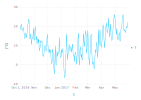

In [54]:
plot(cf_df, :t, :T, kind=:line, ylim=(-10, 30))

Here is `Ta` which ignores negative temperature values. It is the value going to be used for calculating the degree of chilling and forcing.

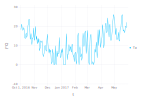

In [55]:
plot(cf_df, :t, :Ta, kind=:line, ylim=(-10, 30))

Now we have the degree of chilling (`c`) and forcing (`f`) per unit time (day).

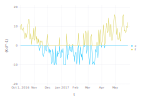

In [56]:
plot(cf_df, :t, [:c, :f], kind=:line, ylim=(-20, 20))

We can more clearly see how chilling and forcing units respond to the base temperature ($T_c$) thanks to interactive plot.

In [57]:
manipulate(ChillForceEstimator, :t, [:c, :f];
    config = (cf_config, dc_config, cherry_config(2017)),
    parameters = :ChillForceEstimator => :Tc => 0:0.1:20,
    stop = 8*30u"d",
    kind = :line,
    ylim = (-20, 20),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["ChillForceEstimator"], Dict{Symbol,Any}(:style => Dict{String,Any}("color" => :darkorchid,"font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tc"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px","color" => :royalblue)))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget",:style => Dict("font-family" => "monospace","width" => "25%"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{WebIO.AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f635b62a4a0, Task (runnable) @0x00007f635b62a4a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n              

The next plot shows how chilling and forcing would accumulate over the period. Note that chilling accumulation (`C`) starts first. Forcing accumulation (`F`) doesn't start until the chilling requirement (`Rc`) is fullfilled. Once the requirement is met, chilling accumulation stops. The output of model, an estimated date of particular phenological event, is determined when forcing accmulation (`F`) make a cross with forcing requirement (`Rf`), which is right before April in this example.

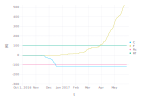

In [58]:
plot(cf_df, :t, [:C, :F, :Rc, :Rf], kind=:line, ylim=(-300, 500))

Here is an interactive version.

In [59]:
manipulate(ChillForceEstimator, :t, [:C, :F, :Rc, :Rf];
    config = (cf_config, dc_config, cherry_config(2017)),
    parameters = :ChillForceEstimator => (;
        Tc = 0:0.1:20,
        Rc = -300:0,
        Rf = 0:500,
    ),
    stop = 8*30u"d",
    kind = :line,
    ylim = (-300, 500),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["ChillForceEstimator"], Dict{Symbol,Any}(:style => Dict{String,Any}("color" => :darkorchid,"font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Tc"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px","color" => :royalblue)))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget",:style => Dict("font-family" => "monospace","width" => "25%"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/srv/julia/pkg/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/all.js"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/InteractBase/sOe2Z/src/../assets/style.css"), WebIO.Asset("css", nothing, "/srv/julia/pkg/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{WebIO.AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f636004bd00, Task (runnable) @0x00007f636004bd00), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n              

Now, let's try `estimate()` to get the answer more directly.

In [60]:
estimate(ChillForceEstimator, [2017], config=(cf_config, dc_config))

1×2 DataFrame
│ Row │ year  │ doy      │
│     │ Int64 │ Quantit… │
├─────┼───────┼──────────┤
│ 1   │ 2017  │ 88 d     │

We may provide additional options as we used to do for `simulate()`.

In [61]:
estimate(ChillForceEstimator, [2017]; config=(cf_config, dc_config), target=[:C, :F])

1×4 DataFrame
│ Row │ year  │ doy      │ C          │ F         │
│     │ Int64 │ Quantit… │ Quantity…  │ Quantity… │
├─────┼───────┼──────────┼────────────┼───────────┤
│ 1   │ 2017  │ 88 d     │ -117.096 K │ 105.088 K │

A nice feature of `estimate()` is that it supports simulation of multiple years in a convenient way. We'll revisit this later in this notebook.

In [62]:
estimate(ChillForceEstimator, 2010:2018; config=(cf_config, dc_config), target=[:C, :F])

9×4 DataFrame
│ Row │ year  │ doy      │ C          │ F         │
│     │ Int64 │ Quantit… │ Quantity…  │ Quantity… │
├─────┼───────┼──────────┼────────────┼───────────┤
│ 1   │ 2010  │ 97 d     │ -114.572 K │ 107.941 K │
│ 2   │ 2011  │ 111 d    │ -113.002 K │ 106.67 K  │
│ 3   │ 2012  │ 81 d     │ -107.307 K │ 102.092 K │
│ 4   │ 2013  │ 108 d    │ -108.324 K │ 108.998 K │
│ 5   │ 2014  │ 104 d    │ -106.856 K │ 108.094 K │
│ 6   │ 2015  │ 107 d    │ -110.128 K │ 102.825 K │
│ 7   │ 2016  │ 93 d     │ -113.562 K │ 111.469 K │
│ 8   │ 2017  │ 88 d     │ -117.096 K │ 105.088 K │
│ 9   │ 2018  │ 105 d    │ -110.023 K │ 101.917 K │

### Observation

#### Ex 7.3.1

Using Cropbox, calibrate the chilling-forcing (CF) models using the Washington DC **Yoshino cherry** blooms and Reagan National weather data **from 1991 to 2010**. Provide parameter estimates and model performance measures for calibration (*i.e.*, RMSE, EF). How do the parameter estimates compare with the ones published in Chung et al. (2011)? If different, why do you think there's such difference when used the same data sets for calibration? 

We have a dataset with recordings of peak bloom dates from cherry trees in Washington, DC.

In [63]:
cherry_dc_obs = CSV.read("cherry_dc_obs.csv") |> unitfy

99×2 DataFrame
│ Row │ year  │ doy      │
│     │ Int64 │ Quantit… │
├─────┼───────┼──────────┤
│ 1   │ 1921  │ 79 d     │
│ 2   │ 1922  │ 97 d     │
│ 3   │ 1923  │ 99 d     │
│ 4   │ 1924  │ 104 d    │
│ 5   │ 1925  │ 86 d     │
│ 6   │ 1926  │ 101 d    │
│ 7   │ 1927  │ 79 d     │
│ 8   │ 1928  │ 99 d     │
│ 9   │ 1929  │ 90 d     │
│ 10  │ 1930  │ 91 d     │
⋮
│ 89  │ 2009  │ 91 d     │
│ 90  │ 2010  │ 90 d     │
│ 91  │ 2011  │ 88 d     │
│ 92  │ 2012  │ 79 d     │
│ 93  │ 2013  │ 99 d     │
│ 94  │ 2014  │ 100 d    │
│ 95  │ 2015  │ 100 d    │
│ 96  │ 2016  │ 85 d     │
│ 97  │ 2017  │ 84 d     │
│ 98  │ 2018  │ 95 d     │
│ 99  │ 2019  │ 91 d     │

### Calibration

We'll calibrate parameters (`Tc`, `Rc`, `Rf`) using the observation dataset from 2000 to 2010.

In [64]:
# cf_calib_config = calibrate(ChillForceEstimator, cherry_dc_obs;
#     configs = @config(dc_config + cherry_config.(1991:2010)),
#     index = :year,
#     target = :doy,
#     parameters = :ChillForceEstimator => (;
#         Tc = (0, 20),
#         Rc = (-1000, 0),
#         Rf = (0, 1000),
#     ),
#     stop = :stop,
#     snap = :stop,
#     callback,
#     optim = (;
#         MaxSteps = 1000,
#     ),
# )

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
10.45 secs, 31 evals, 17 steps, improv/step: 0.765 (last = 0.7647), fitness=195.000000000
20.78 secs, 62 evals, 35 steps, improv/step: 0.771 (last = 0.7778), fitness=55.000000000
31.10 secs, 93 evals, 52 steps, improv/step: 0.712 (last = 0.5882), fitness=55.000000000
41.36 secs, 124 evals, 75 steps, improv/step: 0.627 (last = 0.4348), fitness=55.000000000
51.62 secs, 155 evals, 97 steps, improv/step: 0.577 (last = 0.4091), fitness=55.000000000
61.62 secs, 185 evals, 122 steps, improv/step: 0.541 (last = 0.4000), fitness=55.000000000
71.95 secs, 216 evals, 148 steps, improv/step: 0.527 (last = 0.4615), fitness=55.000000000
82.30 secs, 247 evals, 176 steps, improv/step: 0.511 (last = 0.4286), fitness=55.000000000
92.36 se

Config for 1 systems:
  ChillForceEstimator
    Tc = 0.0477399
    Rc = -777.554
    Rf = 243.46

In [65]:
cf_calib_config = @config :ChillForceEstimator => (;
    Tc = 0.0477399,
    Rc = -777.554,
    Rf = 243.46,
)

Config for 1 systems:
  ChillForceEstimator
    Tc = 0.0477399
    Rc = -777.554
    Rf = 243.46

Now we run the model with calibrated parameters.

In [66]:
est = estimate(ChillForceEstimator, 1991:2010;
    config = (cf_calib_config, dc_config),
    target = [:C, :F],
)

20×4 DataFrame
│ Row │ year  │ doy      │ C            │ F         │
│     │ Int64 │ Quantit… │ Quantity…    │ Quantity… │
├─────┼───────┼──────────┼──────────────┼───────────┤
│ 1   │ 1991  │ 88 d     │ -0.429659 K  │ 250.257 K │
│ 2   │ 1992  │ 98 d     │ -0.763838 K  │ 245.232 K │
│ 3   │ 1993  │ 99 d     │ -0.668359 K  │ 254.152 K │
│ 4   │ 1994  │ 94 d     │ -1.4322 K    │ 257.536 K │
│ 5   │ 1995  │ 88 d     │ -0.763838 K  │ 249.327 K │
│ 6   │ 1996  │ 96 d     │ -1.62316 K   │ 244.689 K │
│ 7   │ 1997  │ 89 d     │ -0.572577 K  │ 245.408 K │
│ 8   │ 1998  │ 91 d     │ -0.0477399 K │ 247.559 K │
│ 9   │ 1999  │ 94 d     │ -0.954798 K  │ 251.981 K │
│ 10  │ 2000  │ 86 d     │ -1.14513 K   │ 251.23 K  │
│ 11  │ 2001  │ 97 d     │ -1.45119 K   │ 252.575 K │
│ 12  │ 2002  │ 90 d     │ -0.286439 K  │ 251.636 K │
│ 13  │ 2003  │ 91 d     │ -1.67197 K   │ 244.891 K │
│ 14  │ 2004  │ 89 d     │ -1.33672 K   │ 246.68 K  │
│ 15  │ 2005  │ 97 d     │ -1.28898 K   │ 258.485 K │
│ 16  │ 2006  │ 90 d     │ -0.687765 K  │ 248.027 K │
│ 17  │ 2007  │ 89 d     │ -1.1935 K    │ 248.589 K │
│ 18  │ 2008  │ 89 d     │ -0.572879 K  │ 256.906 K │
│ 19  │ 2009  │ 93 d     │ -1.24124 K   │ 255.632 K │
│ 20  │ 2010  │ 85 d     │ -1.38446 K   │ 258.094 K │

Here are actual dates for the same period.

In [67]:
cherry_dc_obs[1991 .<= cherry_dc_obs[:year] .<= 2010, :]

20×2 DataFrame
│ Row │ year  │ doy      │
│     │ Int64 │ Quantit… │
├─────┼───────┼──────────┤
│ 1   │ 1991  │ 88 d     │
│ 2   │ 1992  │ 98 d     │
│ 3   │ 1993  │ 101 d    │
│ 4   │ 1994  │ 95 d     │
│ 5   │ 1995  │ 92 d     │
│ 6   │ 1996  │ 95 d     │
│ 7   │ 1997  │ 85 d     │
│ 8   │ 1998  │ 86 d     │
│ 9   │ 1999  │ 95 d     │
│ 10  │ 2000  │ 77 d     │
│ 11  │ 2001  │ 96 d     │
│ 12  │ 2002  │ 92 d     │
│ 13  │ 2003  │ 92 d     │
│ 14  │ 2004  │ 91 d     │
│ 15  │ 2005  │ 99 d     │
│ 16  │ 2006  │ 89 d     │
│ 17  │ 2007  │ 91 d     │
│ 18  │ 2008  │ 89 d     │
│ 19  │ 2009  │ 91 d     │
│ 20  │ 2010  │ 90 d     │

Then let's create a helper function `compare()` to make a plot for comparing observation and estimation of the model.

In [68]:
compare(S, obs, years; config) = begin
    E = estimate(S, years; config)
    O = obs[obs[:year] .∈ Ref(years), :]
    p = plot(O, :year, :doy, name="Obs", kind=:line)
    plot!(p, E, :year, :doy, name="Model", kind=:line)
end

compare (generic function with 1 method)

Again, here is the result of calibration from 1991 to 2010.

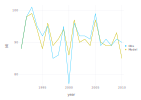

In [69]:
compare(ChillForceEstimator, cherry_dc_obs, 1991:2010, config=(cf_calib_config, dc_config))

In [70]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1991:2010)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :rmse,
)

3.1064449134018135 d

In [71]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1991:2010)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :ef,
)

0.6533764367816092

### Validation

#### Ex 7.3.2

Evaluate the model performance using the **Yoshino cherry** blooms and Reagan National weather data **from 1951 to 1969**. Provide parameter estimates and model performance measures for calibration (*i.e.*, RMSE, EF). Interpret and discuss the results.

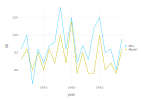

In [72]:
compare(ChillForceEstimator, cherry_dc_obs, 1951:1969, config=(cf_calib_config, dc_config))

In [73]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1951:1969)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :rmse,
)

4.801315609179152 d

In [74]:
evaluate(ChillForceEstimator, cherry_dc_obs;
    configs = @config(cf_calib_config + dc_config + cherry_config.(1951:1969)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :ef,
)

0.17669172932330823

There was a reason why we didn't use the full range of dataset by the way.

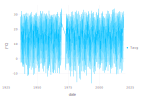

In [75]:
plot(dc_weather, :date, :Tavg, kind=:line)

#### Ex 7.3.3

Import Sea-Tac airport weather data from the weather file and UW Yoshino bloom data. Using the parameter estimates from Question 1 above for the DC data, apply the CF models to predict Yoshino cherry bloom dates at UW since 2005 using Sea-Tac airport temperature data. Plot predicted and observed data over the entire period. Evaluate model performance using the appropriate metrics, interpret and discuss the results. What would you do to improve the predictions for UW cherry bloom times?

In [76]:
seatac_weather = CSV.read("seatac_weather.csv") |> unitfy

26176×2 DataFrame
│ Row   │ date       │ Tavg       │
│       │ Date       │ Quantity…  │
├───────┼────────────┼────────────┤
│ 1     │ 1948-01-01 │ 7.8375 °C  │
│ 2     │ 1948-01-02 │ 4.55 °C    │
│ 3     │ 1948-01-03 │ 5.06667 °C │
│ 4     │ 1948-01-04 │ 4.16667 °C │
│ 5     │ 1948-01-05 │ 4.60833 °C │
│ 6     │ 1948-01-06 │ 6.49583 °C │
│ 7     │ 1948-01-07 │ 7.18333 °C │
│ 8     │ 1948-01-08 │ 5.1375 °C  │
│ 9     │ 1948-01-09 │ 4.9 °C     │
│ 10    │ 1948-01-10 │ 4.1875 °C  │
⋮
│ 26166 │ 2019-08-21 │ 17.4771 °C │
│ 26167 │ 2019-08-22 │ 16.8021 °C │
│ 26168 │ 2019-08-23 │ 17.6677 °C │
│ 26169 │ 2019-08-24 │ 19.1259 °C │
│ 26170 │ 2019-08-25 │ 19.1949 °C │
│ 26171 │ 2019-08-26 │ 19.6231 °C │
│ 26172 │ 2019-08-27 │ 22.1678 °C │
│ 26173 │ 2019-08-28 │ 24.2763 °C │
│ 26174 │ 2019-08-29 │ 19.0279 °C │
│ 26175 │ 2019-08-30 │ 20.5033 °C │
│ 26176 │ 2019-08-31 │ 19.4744 °C │

In [77]:
uw_config = @config (
    :Temperature => (;
        filename = "seatac_weather.csv",
        indexkey = :date,
        tempkey = :Tavg,
    ),
)

Config for 1 systems:
  Temperature
    filename = "seatac_weather.csv"
    indexkey = :date
    tempkey  = :Tavg

In [78]:
cherry_uw_obs = CSV.read("cherry_uw_obs.csv") |> unitfy

17×2 DataFrame
│ Row │ year  │ doy      │
│     │ Int64 │ Quantit… │
├─────┼───────┼──────────┤
│ 1   │ 1994  │ 92 d     │
│ 2   │ 1996  │ 106 d    │
│ 3   │ 2005  │ 90 d     │
│ 4   │ 2006  │ 103 d    │
│ 5   │ 2007  │ 100 d    │
│ 6   │ 2008  │ 101 d    │
│ 7   │ 2009  │ 107 d    │
│ 8   │ 2010  │ 93 d     │
│ 9   │ 2011  │ 103 d    │
│ 10  │ 2012  │ 93 d     │
│ 11  │ 2013  │ 93 d     │
│ 12  │ 2014  │ 80 d     │
│ 13  │ 2015  │ 75 d     │
│ 14  │ 2016  │ 71 d     │
│ 15  │ 2017  │ 85 d     │
│ 16  │ 2018  │ 79 d     │
│ 17  │ 2019  │ 88 d     │

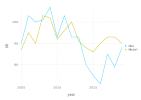

In [79]:
compare(ChillForceEstimator, cherry_uw_obs, 2005:2019, config=(cf_calib_config, uw_config))

In [80]:
evaluate(ChillForceEstimator, cherry_uw_obs;
    configs = @config(cf_calib_config + uw_config + cherry_config.(2005:2019)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :rmse,
)

8.621678104251709 d

In [81]:
evaluate(ChillForceEstimator, cherry_uw_obs;
    configs = @config(cf_calib_config + uw_config + cherry_config.(2005:2019)),
    index = :year,
    target = :doy,
    stop = :stop,
    snap = :stop,
    metric = :ef,
)

0.34524741622298794